In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import PIL
from PIL import Image
from sklearn.utils import shuffle

def ReLU(x):
    x[x<0]=0
    return x;

def Sig(x):
    return 1/(1+np.exp(-x))

def SoftMax(x):
    z=np.exp(x)
    return z/np.sum(z)

def dot(x,alpham,alpham0):
    return (np.matmul(alpham.T,x)+alpham0)


## Convolution function:-

In [2]:
def convolution(img,L,filt,s,padding,func):
    l=int(L/2) # half of L
    X=np.asarray(img)
    
    u=np.shape(X)
    if padding==1:
        if len(u)==3:
            X=np.pad(X,[(l,),(l,),(0,)],mode='constant')
        else:
            X=np.pad(X,[(l,),(l,)],mode='constant')
    
    
    if len(u)==3:
        m,n,d=np.shape(X)
    else:
        m,n=np.shape(X)

    O=np.zeros((int((m-2*l)/s),int((n-2*l)/s)))
    
    # for each i,j consider the square of elements L*L around it, multiply pointwise wth the filter and add up.
    for i in range(l,m-l,s):
        for j in range(l,n-l,s):              
            for k in range(i-l,i+l+1):
                for p in range(j-l,j+l+1):
                    if len(u)==3:
                        if len(np.shape(filt))==3:
                            for q in range(d):
                                O[int((i-l+1)/s)-1][int((j-l+1)/s)-1]+=X[k][p][q]*filt[k-i+l][p-j+l][q]
                        else:
                            for q in range(d):
                                O[int((i-l+1)/s)-1][int((j-l+1)/s)-1]+=X[k][p][q]*filt[k-i+l][p-j+l]
                    else:
                        O[int((i-l+1)/s)-1][int((j-l+1)/s)-1]+=X[k][p]*filt[k-i+l][p-j+l]

                        
    if func=='ReLU':
        O=ReLU(O)
    elif func=='Sig':
        O=Sig(O)

    return O

## Pooling function:-

In [3]:
def pooling(conv_act_map_out,L,s,padding,pool):
    l=int(L/2) # half of the dimension of the pooling filter
    X=conv_act_map_out
    if padding==1:
        X=np.pad(X,[(l,),(l,)],mode='constant')
        
    m,n=np.shape(X)

    O=np.zeros((int((m-2*l)/s),int((n-2*l)/s)))
    
    max_val=0
    
    for i in range(l,m-l,s):
        for j in range(l,n-l,s):
            for k in range(i-l,i+l+1):
                for p in range(j-l,j+l+1):
                    if pool=='Max':
                        if max_val<X[k][p]:
                             O[int((i-l+1)/s)-1][int((j-l+1)/s)-1]=X[k][p]
                    elif pool=='Avg':
                         O[int((i-l+1)/s)-1][int((j-l+1)/s)-1]+=X[k][p]/float(L*L)
                        
    return O
                        
                        
    

## Convolution layer function:-

In [4]:
def conv_layer(img,L,filters,s,padding,func,no_of_filters):
    out=[]
    for i in range(no_of_filters):
        out.append(convolution(img,L,filters[i],s,padding,func))
    out=np.array(out)
    return out

## Pooling volume function:-

In [5]:
def pool_layer(act_map_volume,L,s,padding,pool):
    out=[]
    for i in range(len(act_map_volume)):
        out.append(pooling(act_map_volume[i,:,:],L,s,padding,pool))
    return out


## Composition of layers:-

In [6]:
def composition_of_layers(im,order_of_layers,conv_filter_sizes,pool_filter_sizes,stride_order,pad_order,pool_type_order,filters_per_layer,filters,act_order):
    X=np.asarray(im)
    k=0
    j=0
    for i in range(len(order_of_layers)):
        if order_of_layers[i]=='conv':
            if k!=0:
                X=np.swapaxes(X,0,2)
            imageX=Image.fromarray(X,'RGB')
            X=conv_layer(imageX,L=conv_filter_sizes[k],filters=filters[k],s=stride_order[i],padding=pad_order[i],func=act_order[k],no_of_filters=filters_per_layer[k])
            k+=1
            X=np.array(X)
            print('After',i+1,'th Convolution:\n',np.shape(X))
            for i in range(len(X)):
                out_im=Image.fromarray(X[i])
                plt.imshow(out_im)
                plt.show()
            print('\n\n')
        elif order_of_layers[i]=='pool':
            X=pool_layer(X,L=pool_filter_sizes[j],s=stride_order[i],padding=pad_order[i],pool=pool_type_order[j])
            j+=1
            X=np.array(X)
            print('After',i+1,'th Pooling:\n',np.shape(X))
            for i in range(len(X)):
                out_im=Image.fromarray(X[i])
                plt.imshow(out_im)
                plt.show()
            print('\n\n')
            
    return X

## Unravelling function:-

In [7]:
def unravelling(comp_layer_out,out_dim):
    X=comp_layer_out.flatten()
    s=np.shape(X)
    s=[s[0],out_dim]
    r=np.random.normal(0,0.01,s)
    out=np.dot(X,r)
    return out

## Loading the data

In [8]:
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
Xtrain = np.vstack([img.reshape((28, 28)) for img in mnist.train.images])
ytrain = mnist.train.labels
Xtest = np.vstack([img.reshape(28, 28) for img in mnist.test.images])
ytest = mnist.test.labels
del mnist

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


## Reshaping

(55000, 28, 28)


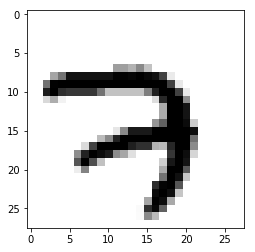

(28, 28) 2 [0. 0. 0. ... 0. 0. 0.]
(10000, 28, 28)


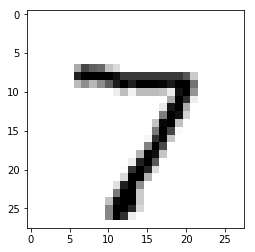

(28, 28) 2 [0. 0. 0. ... 0. 0. 0.]


In [9]:
Xtrain=np.reshape(Xtrain,(55000,28,28))
print(np.shape(Xtrain))
plt.imshow(Xtrain[0],cmap=plt.cm.binary)
plt.show()
x=np.shape(Xtrain[0])
print(x,len(x),ytrain[:,0])

Xtest=np.reshape(Xtest,(10000,28,28))
print(np.shape(Xtest))
plt.imshow(Xtest[0],cmap=plt.cm.binary)
plt.show()
x=np.shape(Xtest[0])
print(x,len(x),ytest[:,0])

In [10]:
def SoftMax(x):
    ex=np.exp(x)
    return ex/ex.sum()

def dsig(x):
    return (Sig(x)-Sig(x)**2)

def der_SoftMax(x):
    s=x.reshape(-1,1)
    return np.diagflat(s)-np.dot(s,s.T)

In [11]:
def MLP_fwd_pass(x,alpham,alpham0,betam,betam0):
    out1=np.dot(x,alpham,alpham0)
    z=Sig(out1)
    out2=np.dot(z,betam,betam0)
    y=SoftMax(out2)
    return z,out2,y


Loss=summation from i=1 to n (-y*log(y'))
dLoss/dx =-y/y' *dy'/dx

## Backpropogation using stochastic gradient approach

(28, 28)


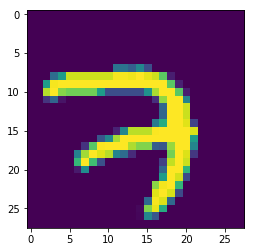

(32, 14, 14)
(32, 7, 7)
(7, 7, 32)
(64, 3, 3)
(64, 1, 1)
(10, 55000)
o2 (14, 14, 32)
i (28, 28)
o3 (7, 7, 32)
o4 (3, 3, 64)
(10,) (10,)
(28, 28)


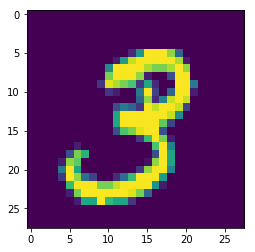

(32, 14, 14)
(32, 7, 7)
(7, 7, 32)
(64, 3, 3)
(64, 1, 1)
(55000, 10)
o2 (14, 14, 32)
i (28, 28)
o3 (7, 7, 32)
o4 (3, 3, 64)
(10,) (10,)
(28, 28)


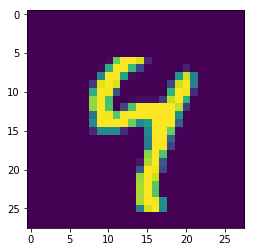

(32, 14, 14)
(32, 7, 7)
(7, 7, 32)
(64, 3, 3)
(64, 1, 1)
(10, 55000)
o2 (14, 14, 32)
i (28, 28)
o3 (7, 7, 32)
o4 (3, 3, 64)
(10,) (10,)
(28, 28)


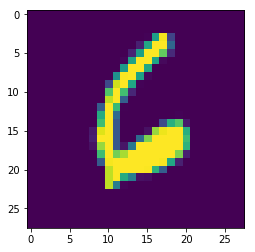

(32, 14, 14)
(32, 7, 7)
(7, 7, 32)
(64, 3, 3)
(64, 1, 1)
(55000, 10)
o2 (14, 14, 32)
i (28, 28)
o3 (7, 7, 32)
o4 (3, 3, 64)
(10,) (10,)
(28, 28)


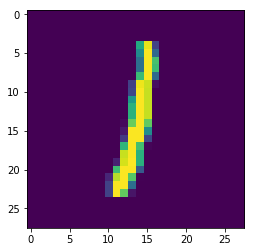

(32, 14, 14)
(32, 7, 7)
(7, 7, 32)
(64, 3, 3)
(64, 1, 1)
(10, 55000)
o2 (14, 14, 32)
i (28, 28)
o3 (7, 7, 32)
o4 (3, 3, 64)
(10,) (10,)
(28, 28)


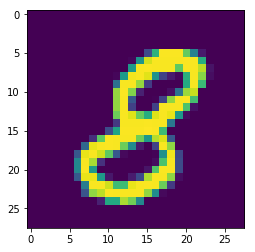

(32, 14, 14)
(32, 7, 7)
(7, 7, 32)
(64, 3, 3)
(64, 1, 1)
(55000, 10)
o2 (14, 14, 32)
i (28, 28)
o3 (7, 7, 32)
o4 (3, 3, 64)
(10,) (10,)
(28, 28)


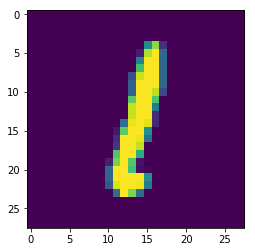

(32, 14, 14)
(32, 7, 7)
(7, 7, 32)
(64, 3, 3)
(64, 1, 1)
(10, 55000)
o2 (14, 14, 32)
i (28, 28)
o3 (7, 7, 32)
o4 (3, 3, 64)
(10,) (10,)
(28, 28)


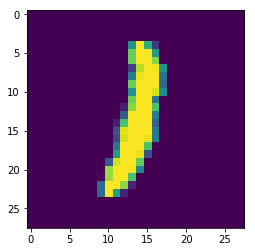

(32, 14, 14)
(32, 7, 7)
(7, 7, 32)
(64, 3, 3)
(64, 1, 1)
(10, 55000)
o2 (14, 14, 32)
i (28, 28)
o3 (7, 7, 32)
o4 (3, 3, 64)
(10,) (10,)
(28, 28)


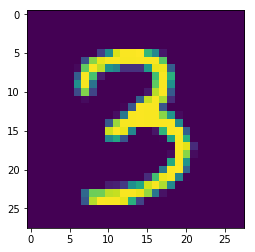

(32, 14, 14)
(32, 7, 7)
(7, 7, 32)
(64, 3, 3)
(64, 1, 1)
(55000, 10)
o2 (14, 14, 32)
i (28, 28)
o3 (7, 7, 32)
o4 (3, 3, 64)
(10,) (10,)
(28, 28)


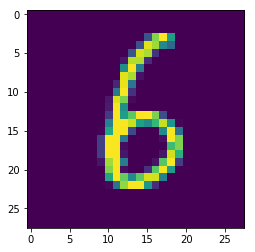

(32, 14, 14)
(32, 7, 7)
(7, 7, 32)
(64, 3, 3)
(64, 1, 1)
(10, 55000)
o2 (14, 14, 32)
i (28, 28)
o3 (7, 7, 32)
o4 (3, 3, 64)
(10,) (10,)
(28, 28)


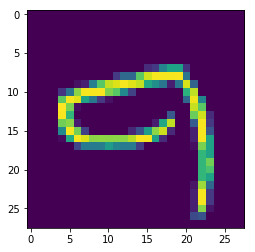

(32, 14, 14)
(32, 7, 7)
(7, 7, 32)
(64, 3, 3)
(64, 1, 1)
(55000, 10)
o2 (14, 14, 32)
i (28, 28)
o3 (7, 7, 32)
o4 (3, 3, 64)
(10,) (10,)
(28, 28)


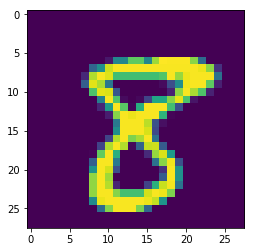

(32, 14, 14)
(32, 7, 7)
(7, 7, 32)
(64, 3, 3)
(64, 1, 1)
(10, 55000)
o2 (14, 14, 32)
i (28, 28)
o3 (7, 7, 32)
o4 (3, 3, 64)
(10,) (10,)
(28, 28)


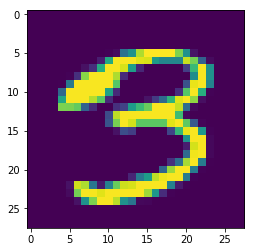

(32, 14, 14)
(32, 7, 7)
(7, 7, 32)
(64, 3, 3)
(64, 1, 1)
(55000, 10)
o2 (14, 14, 32)
i (28, 28)
o3 (7, 7, 32)
o4 (3, 3, 64)
(10,) (10,)
(28, 28)


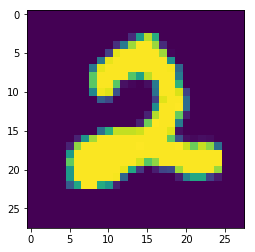

(32, 14, 14)
(32, 7, 7)
(7, 7, 32)
(64, 3, 3)
(64, 1, 1)
(10, 55000)
o2 (14, 14, 32)
i (28, 28)
o3 (7, 7, 32)
o4 (3, 3, 64)
(10,) (10,)
(28, 28)


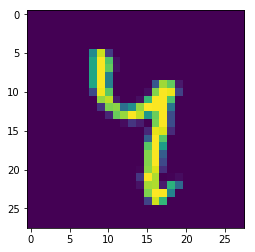

(32, 14, 14)
(32, 7, 7)
(7, 7, 32)
(64, 3, 3)
(64, 1, 1)
(10, 55000)
o2 (14, 14, 32)
i (28, 28)
o3 (7, 7, 32)
o4 (3, 3, 64)
(10,) (10,)
(28, 28)


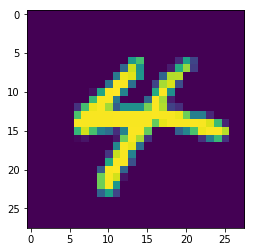

(32, 14, 14)
(32, 7, 7)
(7, 7, 32)
(64, 3, 3)
(64, 1, 1)
(55000, 10)
o2 (14, 14, 32)
i (28, 28)
o3 (7, 7, 32)
o4 (3, 3, 64)
(10,) (10,)
(28, 28)


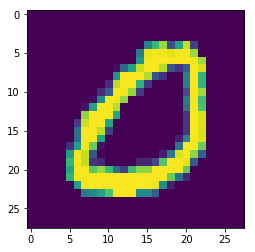

(32, 14, 14)
(32, 7, 7)
(7, 7, 32)
(64, 3, 3)
(64, 1, 1)
(10, 55000)
o2 (14, 14, 32)
i (28, 28)
o3 (7, 7, 32)
o4 (3, 3, 64)
(10,) (10,)
(28, 28)


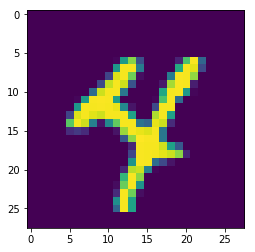

(32, 14, 14)
(32, 7, 7)
(7, 7, 32)
(64, 3, 3)
(64, 1, 1)
(55000, 10)
o2 (14, 14, 32)
i (28, 28)
o3 (7, 7, 32)
o4 (3, 3, 64)
(10,) (10,)
(28, 28)


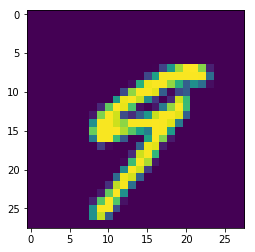

(32, 14, 14)
(32, 7, 7)
(7, 7, 32)
(64, 3, 3)
(64, 1, 1)
(10, 55000)
o2 (14, 14, 32)
i (28, 28)
o3 (7, 7, 32)
o4 (3, 3, 64)
(10,) (10,)
(28, 28)


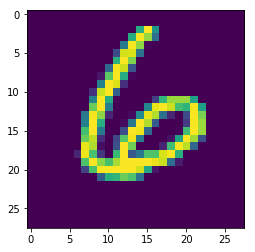

(32, 14, 14)
(32, 7, 7)
(7, 7, 32)
(64, 3, 3)
(64, 1, 1)
(55000, 10)
o2 (14, 14, 32)
i (28, 28)
o3 (7, 7, 32)
o4 (3, 3, 64)
(10,) (10,)
(28, 28)


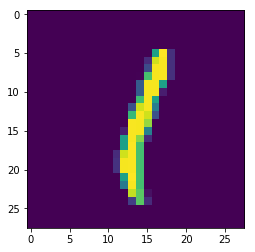

(32, 14, 14)
(32, 7, 7)
(7, 7, 32)
(64, 3, 3)
(64, 1, 1)
(10, 55000)
o2 (14, 14, 32)
i (28, 28)
o3 (7, 7, 32)
o4 (3, 3, 64)
(10,) (10,)
(28, 28)


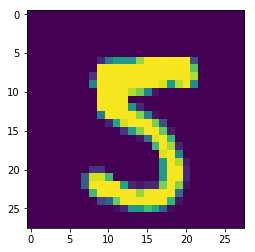

(32, 14, 14)
(32, 7, 7)
(7, 7, 32)
(64, 3, 3)
(64, 1, 1)
(10, 55000)
o2 (14, 14, 32)
i (28, 28)
o3 (7, 7, 32)
o4 (3, 3, 64)
(10,) (10,)
(28, 28)


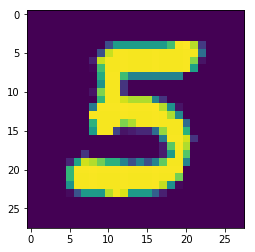

(32, 14, 14)
(32, 7, 7)
(7, 7, 32)
(64, 3, 3)
(64, 1, 1)
(55000, 10)
o2 (14, 14, 32)
i (28, 28)
o3 (7, 7, 32)
o4 (3, 3, 64)
(10,) (10,)
(28, 28)


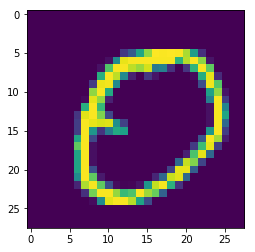

(32, 14, 14)
(32, 7, 7)
(7, 7, 32)
(64, 3, 3)
(64, 1, 1)
(10, 55000)
o2 (14, 14, 32)
i (28, 28)
o3 (7, 7, 32)
o4 (3, 3, 64)
(10,) (10,)
(28, 28)


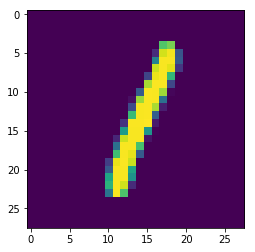

(32, 14, 14)
(32, 7, 7)
(7, 7, 32)
(64, 3, 3)
(64, 1, 1)
(55000, 10)
o2 (14, 14, 32)
i (28, 28)
o3 (7, 7, 32)
o4 (3, 3, 64)
(10,) (10,)
(28, 28)


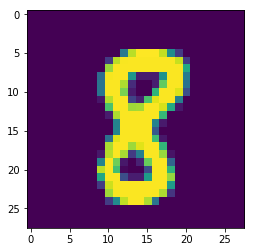

(32, 14, 14)
(32, 7, 7)
(7, 7, 32)
(64, 3, 3)
(64, 1, 1)
(10, 55000)
o2 (14, 14, 32)
i (28, 28)
o3 (7, 7, 32)
o4 (3, 3, 64)
(10,) (10,)
(28, 28)


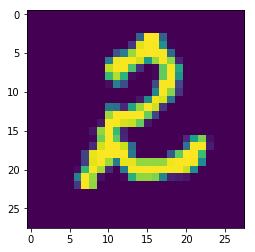

(32, 14, 14)
(32, 7, 7)
(7, 7, 32)
(64, 3, 3)
(64, 1, 1)
(55000, 10)
o2 (14, 14, 32)
i (28, 28)
o3 (7, 7, 32)
o4 (3, 3, 64)
(10,) (10,)
(28, 28)


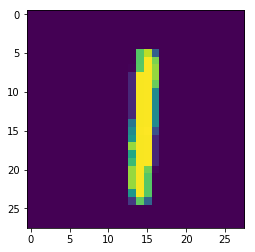

(32, 14, 14)
(32, 7, 7)
(7, 7, 32)
(64, 3, 3)
(64, 1, 1)
(10, 55000)
o2 (14, 14, 32)
i (28, 28)
o3 (7, 7, 32)
o4 (3, 3, 64)
(10,) (10,)
(28, 28)


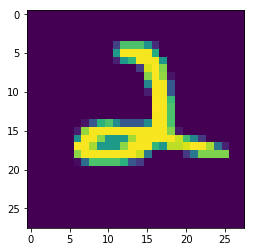

(32, 14, 14)
(32, 7, 7)
(7, 7, 32)
(64, 3, 3)
(64, 1, 1)
(10, 55000)
o2 (14, 14, 32)
i (28, 28)
o3 (7, 7, 32)
o4 (3, 3, 64)
(10,) (10,)
(28, 28)


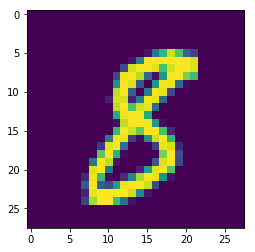

(32, 14, 14)
(32, 7, 7)
(7, 7, 32)


KeyboardInterrupt: 

In [12]:

L1=5
L2=5
filter_count1=32
filter_count2=64

filters1=np.random.normal(0.1,0.2,(filter_count1,L1,L1)) 
filters2=np.random.normal(0.1,0.2,(filter_count2,L2,L2)) 

p=2

L=1024
M=128
K=10

alpham=np.random.normal(0,0.01,(L,M))
alpham0=np.random.normal(0,0.01,M)
betam=np.random.normal(0,0.01,(M,K))
betam0=np.random.normal(0,0.01,K)

N=len(Xtrain)
N=7  ######################  for training on full data set, remove this command
epoch=15##############################
lr1=1e-4
lr2=2e-4

for t in range(epoch):
    for i in range(N):
        I=Xtrain[i]
        print(np.shape(I))
        plt.imshow(I)
        plt.show()
        
        O2=conv_layer(I,L1,filters1,s=2,padding=1,func="ReLU",no_of_filters=filter_count1)
        print(np.shape(O2))
        
        O3=pool_layer(O2,p,s=2,padding=1,pool="Max")
        print(np.shape(O3))
        O3=np.swapaxes(O3,0,2)
        print(np.shape(O3))
        
        O4=conv_layer(O3,L2,filters2,s=2,padding=1,func="ReLU",no_of_filters=filter_count2)
        print(np.shape(O4))
        
        O5=pool_layer(O4,p,s=2,padding=1,pool="Max")
        print(np.shape(O5))
        O5=np.array(O5)
        X=unravelling(O5,L)

        Z,T,Y=MLP_fwd_pass(X,alpham,alpham0,betam,betam0)
        ytrain=np.array(ytrain.T)
        print(np.shape(ytrain))
        
        O2=np.swapaxes(O2,0,2)
        col=len(O2[0])
        print('o2',np.shape(O2))
        print('i',np.shape(I))
        for j in range(filter_count1):
            for k in range(L1):
                for l in range(L1):
                    for q in range(K):
                        filters1[j][k][l]-=lr1*-(ytrain[i][q]/Y[q])*dsig(np.sum(O2[int((q+1)/col)][(q+1)%col]))*I[int((q+1)/col)-k][((q+1)%col)-l]
        
        O4=np.swapaxes(O4,0,2)
        col=len(O4[0])
        print('o3',np.shape(O3))
        print('o4',np.shape(O4))
        for j in range(filter_count2):
            for k in range(L2):
                for l in range(L2):
                    for q in range(K):
                        filters2[j][k][l]-=lr1*-(ytrain[i][q]/Y[q])*dsig(np.sum(O4[int((q+1)/col-1)][(q+1)%col-1]))*np.sum(O3[int((q+1)/col)-k][((q+1)%col)-l])

        der_gk=np.sum(der_SoftMax(T),axis=0)
        print(np.shape(T),np.shape(der_gk))
        for m in range(M):
            for l in range(L):
                for k in range(K):
                    alpham[l][m]-=lr2*-(ytrain[i][k]/Y[k])*der_gk[k]*betam[m][k]*X[l]
                    
        for k in range(K):
            for m in range(M):
                betam[m][k]-=lr2*-(ytrain[i][k]/Y[k])*der_gk[k]*Z[m]    
                
    ytrain=ytrain.T
    Xtrain,ytrain=shuffle(Xtrain,ytrain,random_state=0) # shuffling at the end of an epoch
                


## Backpropogation using batch gradient descent

In [ ]:
L1=5
L2=5
filter_count1=32
filter_count2=64

filters1=np.random.normal(0.1,0.2,(filter_count1,L1,L1)) 
filters2=np.random.normal(0.1,0.2,(filter_count2,L2,L2)) 

p=2

L=1024
M=128
K=10

alpham=np.random.normal(0,0.01,(L,M))
alpham0=np.random.normal(0,0.01,M)
betam=np.random.normal(0,0.01,(M,K))
betam0=np.random.normal(0,0.01,K)

N=len(Xtrain)
N=10  ############ for training on full data set, remove this command
epoch=15
lr1=1e-4
lr2=2e-4

Y_list=[]
ytrain_list=[]
batch_size=10

for t in range(epoch):
    for i in range(len(Xtrain)):
        I=Xtrain[i]
        print(np.shape(I))
        plt.imshow(I)
        plt.show()

        O2=conv_layer(I,L1,filters1,s=2,padding=1,func="ReLU",no_of_filters=filter_count1)
        print(np.shape(O2))

        O3=pool_layer(O2,p,s=2,padding=1,pool="Max")
        print(np.shape(O3))
        O3=np.swapaxes(O3,0,2)
        print(np.shape(O3))

        O4=conv_layer(O3,L2,filters2,s=2,padding=1,func="ReLU",no_of_filters=filter_count2)
        print(np.shape(O4))

        O5=pool_layer(O4,p,s=2,padding=1,pool="Max")
        print(np.shape(O5))
        O5=np.array(O5)
        X=unravelling(O5,L)
    
        Z,T,Y=MLP_fwd_pass(X,alpham,alpham0,betam,betam0)
        Y_list.append(Y)
        ytrain_list.append(ytrain[i])
        
        if i%(batch_size-1)==0:  # when batch size amount of samples pass through the N/W
            Y_list=np.array(Y_list)
            ytrain=np.array(ytrain.T)
            print(np.shape(ytrain))

            O2=np.swapaxes(O2,0,2)
            col=len(O2[0])
            print('o2',np.shape(O2))
            print('i',np.shape(I))
            for f in range(batch_size): 
                for j in range(filter_count1):
                    for k in range(L1):
                        for l in range(L1):
                            for q in range(K):
                                filters1[j][k][l]-=lr1*-(ytrain_list[f][q]/Y_list[f][q])*dsig(np.sum(O2[int((q+1)/col)][(q+1)%col]))*I[int((q+1)/col)-k][((q+1)%col)-l]

            O4=np.swapaxes(O4,0,2)
            col=len(O4[0])
            print('o3',np.shape(O3))
            print('o4',np.shape(O4))
            for f in range(batch_size):
                for j in range(filter_count2):
                    for k in range(L2):
                        for l in range(L2):
                            for q in range(K):
                                filters2[j][k][l]-=lr1*-(ytrain_list[f][q]/Y_list[f][q])*dsig(np.sum(O4[int((q+1)/col-1)][(q+1)%col-1]))*np.sum(O3[int((q+1)/col)-k][((q+1)%col)-l])

            der_gk=np.sum(der_SoftMax(T),axis=0)
            print(np.shape(T),np.shape(der_gk))
            for f in range(batch_size):
                for m in range(M):
                    for l in range(L):
                        for k in range(K):
                            alpham[l][m]-=lr2*-(ytrain_list[f][k]/Y_list[f][k])*der_gk[k]*betam[m][k]*X[l]
                            
            for f in range(batch_size):
                for k in range(K):
                    for m in range(M):
                        betam[m][k]-=lr2*-(ytrain_list[f][k]/Y_list[f][k])*der_gk[k]*Z[m]   
            
            Y_list=[]
            ytrain_list=[]
            
    ytrain=ytrain.T
    Xtrain,ytrain=shuffle(Xtrain,ytrain,random_state=0) # shuffling at the end of an epoch


## Since the above network takes much time, we are training in a small network to get the results faster

(28, 28)


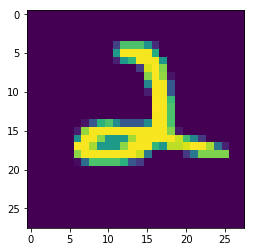

(28, 28)


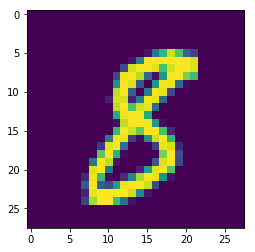

(28, 28)


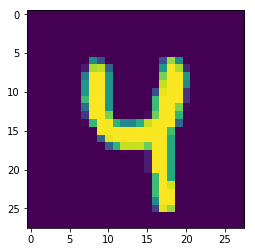

(28, 28)


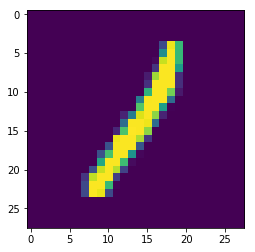

(28, 28)


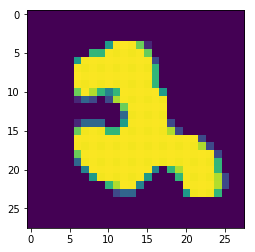

(28, 28)


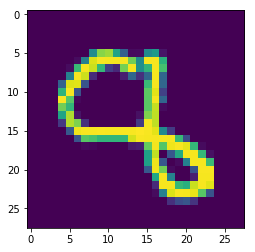

(28, 28)


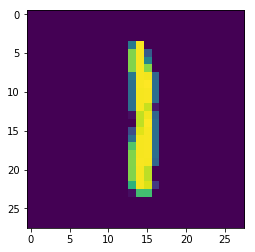

(28, 28)


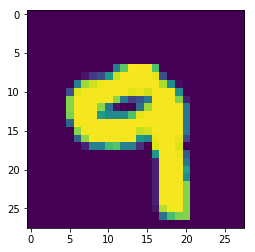

(28, 28)


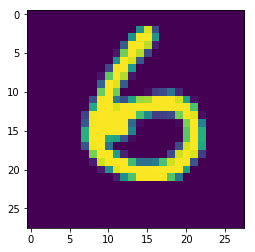

(28, 28)


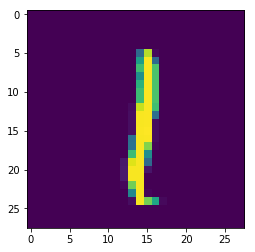

train error is: 2.30349036964462 at epoch= 0
Accuracy: 0.2
test error is: 2.2984881413264264 at epoch= 0


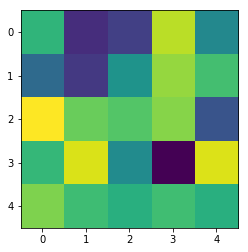

(28, 28)


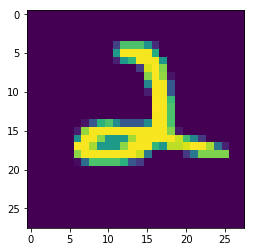

(28, 28)


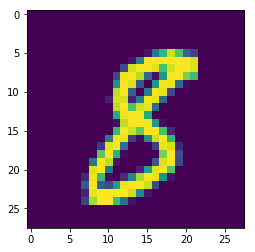

(28, 28)


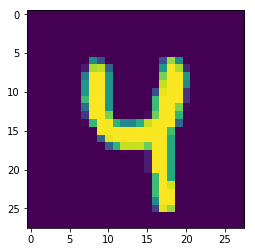

(28, 28)


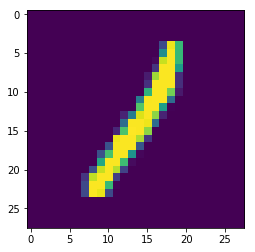

(28, 28)


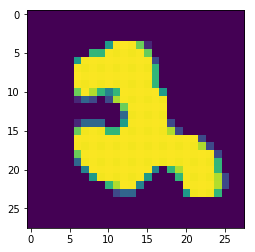

(28, 28)


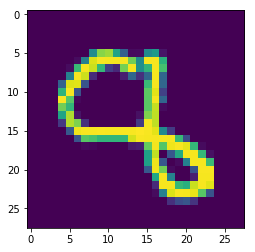

(28, 28)


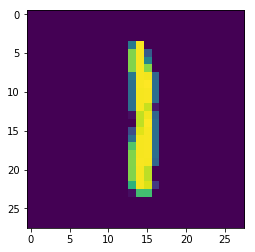

(28, 28)


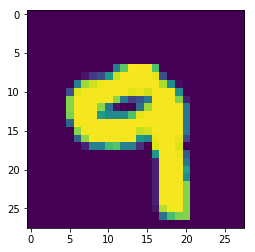

(28, 28)


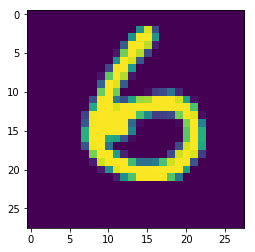

(28, 28)


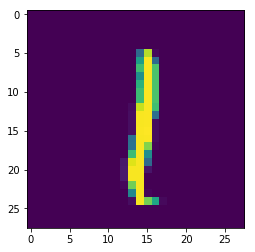

train error is: 2.303795493081979 at epoch= 1
Accuracy: 0.2
test error is: 2.297960143815592 at epoch= 1


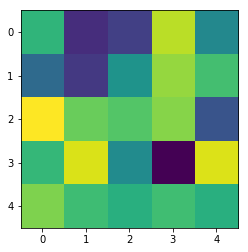

(28, 28)


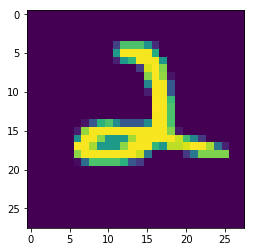

(28, 28)


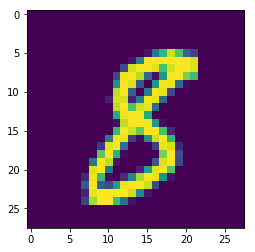

(28, 28)


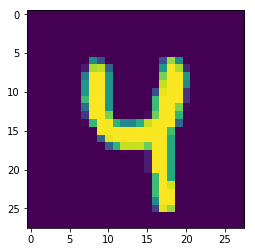

(28, 28)


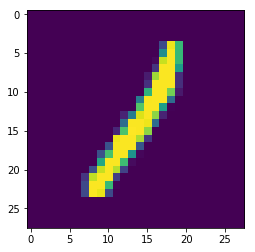

(28, 28)


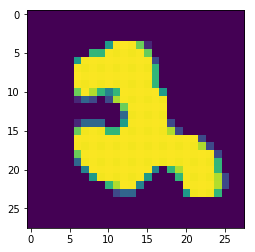

(28, 28)


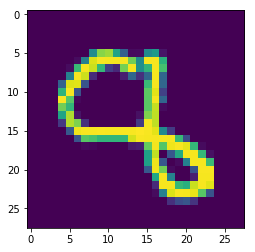

(28, 28)


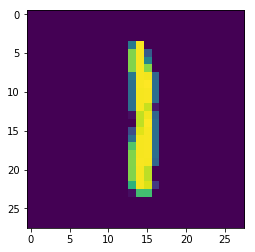

(28, 28)


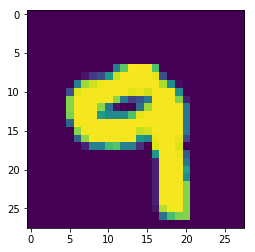

(28, 28)


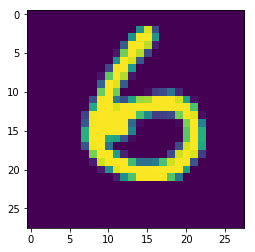

(28, 28)


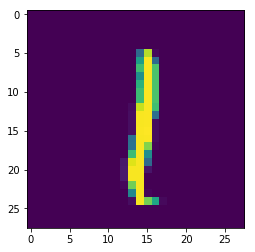

train error is: 2.3038101042331993 at epoch= 2
Accuracy: 0.2
test error is: 2.2976530021834622 at epoch= 2


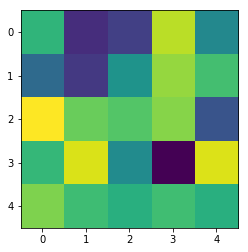

(28, 28)


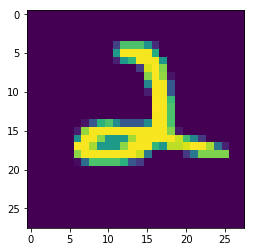

(28, 28)


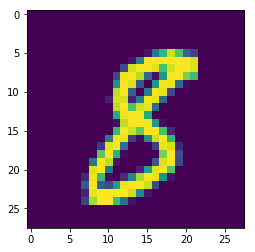

(28, 28)


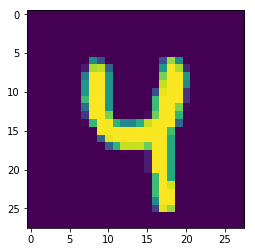

(28, 28)


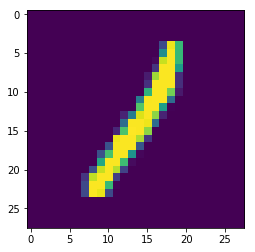

(28, 28)


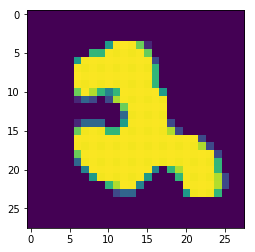

(28, 28)


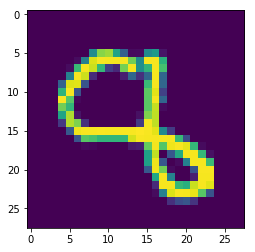

(28, 28)


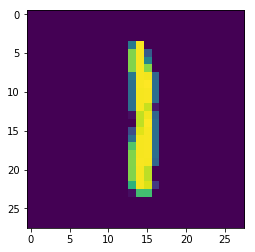

(28, 28)


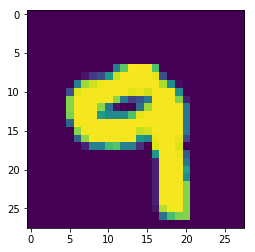

(28, 28)


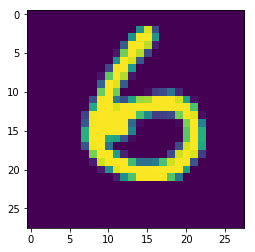

(28, 28)


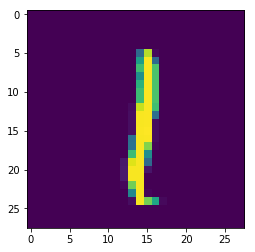

train error is: 2.30437118002717 at epoch= 3
Accuracy: 0.2
test error is: 2.2971288475863227 at epoch= 3


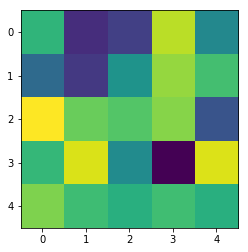

(28, 28)


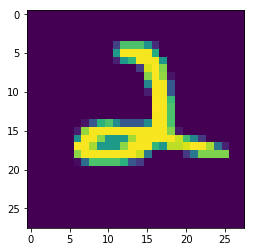

(28, 28)


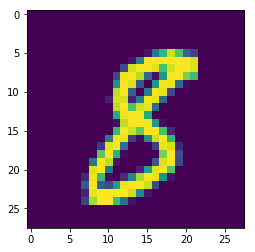

(28, 28)


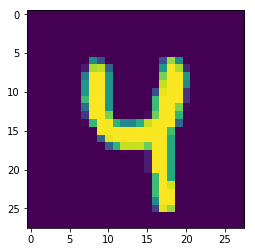

(28, 28)


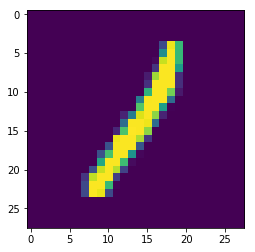

(28, 28)


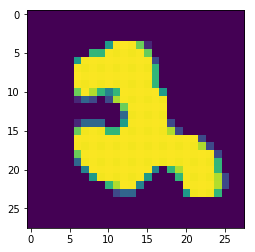

(28, 28)


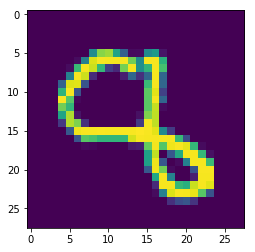

(28, 28)


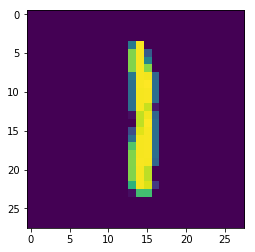

(28, 28)


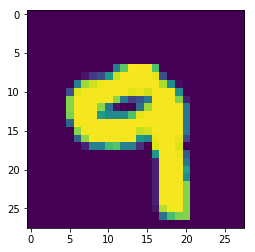

(28, 28)


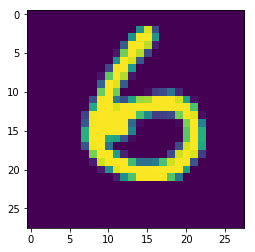

(28, 28)


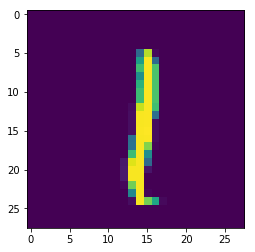

train error is: 2.3046181237653767 at epoch= 4
Accuracy: 0.2
test error is: 2.296492729028116 at epoch= 4


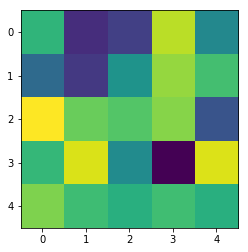

In [21]:
L1=5
L2=5
filter_count1=1

filters1=np.random.normal(0.1,0.2,(filter_count1,L1,L1)) 

p=2

L=1024
M=128
K=10

alpham=np.random.normal(0,0.01,(L,M))
alpham0=np.random.normal(0,0.01,M)
betam=np.random.normal(0,0.01,(M,K))
betam0=np.random.normal(0,0.01,K)

N=len(Xtrain)
N=10 ############################  To check the code, N is kept as 10
epoch=5 ############################ and epoch is kept as 5
lr1=1e-4
lr2=2e-4

train_errors=[]
test_errors=[]

for t in range(epoch):
    for i in range(N):
        I=Xtrain[i]
        print(np.shape(I))
        plt.imshow(I)
        plt.show()
        
        O2=conv_layer(I,L1,filters1,s=2,padding=1,func="ReLU",no_of_filters=filter_count1)
        #print(np.shape(O2))
        
        O3=pool_layer(O2,p,s=2,padding=1,pool="Max")
        #print(np.shape(O3))
        O3=np.swapaxes(O3,0,2)
        #print(np.shape(O3))

        
        O3=np.array(O3)
        X=unravelling(O3,L)

        Z,T,Y=MLP_fwd_pass(X,alpham,alpham0,betam,betam0)
        ytrain=np.array(ytrain.T)
        #print(np.shape(ytrain))
        
        O2=np.swapaxes(O2,0,2)
        col=len(O2[0])
        #print('o2',np.shape(O2))
        #print('i',np.shape(I))
        for j in range(filter_count1):
            for k in range(L1):
                for l in range(L1):
                    for q in range(K):
                        filters1[j][k][l]-=lr1*-(ytrain[i][q]/Y[q])*dsig(np.sum(O2[int((q+1)/col)][(q+1)%col]))*I[int((q+1)/col)-k][((q+1)%col)-l]
        

        der_gk=np.sum(der_SoftMax(T),axis=0)
        #print(np.shape(T),np.shape(der_gk))
        for m in range(M):
            for l in range(L):
                for k in range(K):
                    alpham[l][m]-=lr2*-(ytrain[i][k]/Y[k])*der_gk[k]*betam[m][k]*X[l]
                    
        for k in range(K):
            for m in range(M):
                betam[m][k]-=lr2*-(ytrain[i][k]/Y[k])*der_gk[k]*Z[m]
                
    # finding training error
    train_error=0
    for i in range(N):
        I=Xtrain[i]
#         print(np.shape(I))
#         plt.imshow(I)
#         plt.show()
        
        O2=conv_layer(I,L1,filters1,s=2,padding=1,func="ReLU",no_of_filters=filter_count1)
        #print(np.shape(O2))
        
        O3=pool_layer(O2,p,s=2,padding=1,pool="Max")
        
        O3=np.array(O3)
        X=unravelling(O3,L)

        Z,T,Y=MLP_fwd_pass(X,alpham,alpham0,betam,betam0)
        for k in range(K):
            train_error+=-ytrain[i][k]*np.log(Y[k]) #cross entropy
    print('train error is:',train_error/(N*1.0),'at epoch=',t)
    train_errors.append(train_error)

    # finding training error
    test_error=0
    accuracy=0
    for i in range(N):
        I=Xtest[i]
#         print(np.shape(I))
#         plt.imshow(I)
#         plt.show()
        
        O2=conv_layer(I,L1,filters1,s=2,padding=1,func="ReLU",no_of_filters=filter_count1)
        #print(np.shape(O2))
        
        O3=pool_layer(O2,p,s=2,padding=1,pool="Max")

        O3=np.array(O3)
        X=unravelling(O3,L)

        Z,T,Y=MLP_fwd_pass(X,alpham,alpham0,betam,betam0)
        maximum=0
        ans1=0
        ans2=0
        for k in range(K):
            test_error+=-ytest[i][k]*np.log(Y[k]) #cross entropy
            if maximum<Y[k] :
                ans1=k
                maximum=Y[k]
        for k in range(K):
            if ytest[i][k]==1:
                ans2=k
        if ans1==ans2:
            accuracy+=1
    
    print("Accuracy:",accuracy/(N*1.0))
    print('test error is:',test_error/(N*1.0),'at epoch=',t)
    test_errors.append(test_error)
    plt.imshow(filters1[0])
    plt.show()



The train error, test error and accuracy are reported at the end of each epoch. 
Initially, the filter looks random. But as the epochs passes, the filters tend to identify the local patterns.

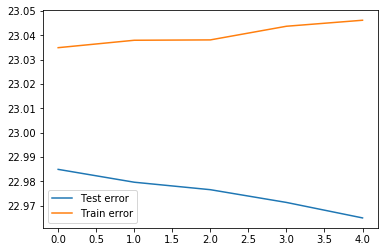

In [24]:
plt.plot(range(epoch),test_errors,label='Test error')
plt.plot(range(epoch),train_errors,label='Train error')
plt.legend()
plt.show()

If you want to train with more train samples and for more time, please change the values of N and epoch.
As you can see, the training error decreases with epochs. Since the value of N we took was just 10, 
the model was trained on just 10 samples. No wonder, the testing error is not decreasing.
Since it took much time for training, the statistics shown below 
were noted for a low value of N and a single convolutional layer with only one filter per layer